In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import autocorrelation_plot
import seaborn as sns

import pmdarima as pm
from statsmodels.tsa.stattools import adfuller, kpss
import datetime

from sqlalchemy import text
from koneksi import Connection
import pytz

C:\Users\HUMAN\AppData\Local\Temp\ipykernel_22616\3723529424.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
conn = Connection()

In [3]:
# df_history = pd.read_pickle("df_history.pk") 

In [4]:
# df_history = pd.read_pickle("df_history.pk")  
# df_history['timestamp'] = df_history['ts'].copy()
# df_history['timestamp'] = pd.to_datetime(df_history['timestamp'], unit="ms")
# df_history.sort_values(by=["ts"], inplace=True)
# df_history.set_index('timestamp', inplace=True)

In [339]:
start_date = '2023-07-01'
end_date = '2023-12-15'
sensor_key = 'usage1'
# device_id = '1ed45f68f33ee5088ec7b366f4bfadd' # 419
# device_id = '1eda70091e20d09815fbb86d26ea9a1' # 424
# device_id = '1ec4dc8af0a2b808835398948de99b8' # colo-ws1
# device_id = '1ecf87758152460a2f9bf0c06bf2226' # colo-ws2
device_id = '1ee01383af6c0308c68d371b81349fd' # colo-ws3

In [340]:
timezone = pytz.timezone('GMT')
ts_start_date = datetime.datetime.strptime(start_date, '%Y-%m-%d').replace(tzinfo=pytz.utc).astimezone(timezone).timestamp()  * 1e3
ts_end_date = datetime.datetime.strptime(f'{end_date} 23:59:59.999999', '%Y-%m-%d %H:%M:%S.%f').replace(tzinfo=pytz.utc).astimezone(timezone).timestamp()  * 1e3

sql_device = text("SELECT * FROM device")
print(sql_device, device_id, ts_start_date, ts_end_date)
df_device = await conn.df_conniot(sql_device)
df_device = df_device.rename(columns={'id': 'id_device'})
sql_customer = text("SELECT * FROM customer")
print(sql_customer)
df_customer = await conn.df_conniot(sql_customer)
df_customer = df_customer.rename(columns={'id': 'id_customer'})
sql = text(f"SELECT * FROM ts_kv WHERE entity_id=:entity_id AND key=:key AND ts >= :ts_start AND ts <= :ts_end")
sql = sql.bindparams(
    key=sensor_key,
    entity_id=device_id,
    ts_start=ts_start_date,
    ts_end=ts_end_date,
)
print(sql)
df = await conn.df_conniot(sql)
print(df)

# df = pd.read_csv('df_1aug_31dec.csv')
merged_df = pd.merge(df, pd.merge(df_device, df_customer[['id_customer', 'title']], left_on='customer_id', right_on='id_customer', how='left')[['id_device', 'id_customer', 'name', 'title']], left_on='entity_id', right_on='id_device', how='left')
print(merged_df)
df_history = merged_df.rename(columns={'name': 'name_device', 'title': 'name_customer'})
print(df_history, 'merge last')

SELECT * FROM device 1ee01383af6c0308c68d371b81349fd 1688169600000.0 1702684799999.999
SELECT * FROM customer
SELECT * FROM ts_kv WHERE entity_id=:entity_id AND key=:key AND ts >= :ts_start AND ts <= :ts_end
       entity_type                        entity_id     key             ts  \
0           DEVICE  1ee01383af6c0308c68d371b81349fd  usage1  1688170098094   
1           DEVICE  1ee01383af6c0308c68d371b81349fd  usage1  1688170156460   
2           DEVICE  1ee01383af6c0308c68d371b81349fd  usage1  1688170216083   
3           DEVICE  1ee01383af6c0308c68d371b81349fd  usage1  1688170276022   
4           DEVICE  1ee01383af6c0308c68d371b81349fd  usage1  1688170337045   
...            ...                              ...     ...            ...   
316930      DEVICE  1ee01383af6c0308c68d371b81349fd  usage1  1702618627961   
316931      DEVICE  1ee01383af6c0308c68d371b81349fd  usage1  1702618676150   
316932      DEVICE  1ee01383af6c0308c68d371b81349fd  usage1  1702618685583   
316933      

In [341]:
merged_df

,entity_type,entity_id,key,ts,bool_v,str_v,long_v,dbl_v,id_device,id_customer,name,title
0,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1688170098094,None,None,86965499,None,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat
1,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1688170156460,None,None,87083718,None,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat
2,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1688170216083,None,None,87197992,None,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat
3,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1688170276022,None,None,87328507,None,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat
4,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1688170337045,None,None,87435949,None,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat
...,...,...,...,...,...,...,...,...,...,...,...,...
316930,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1702618627961,None,None,1223969,None,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat
316931,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1702618676150,None,None,1256908,None,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat
316932,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1702618685583,None,None,1268636,None,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat
316933,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1702618727523,None,None,1295699,None,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat


In [342]:
df_history['timestamp'] = df_history['ts'].copy()
df_history['timestamp'] = pd.to_datetime(df_history['timestamp'], unit="ms")
df_history.sort_values(by=["ts"], inplace=True)
df_history.set_index('timestamp', inplace=True)

In [343]:
df_history

,entity_type,entity_id,key,ts,bool_v,str_v,long_v,dbl_v,id_device,id_customer,name_device,name_customer
timestamp,,,,,,,,,,,,
2023-07-01 00:00:16.139,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1688169616139,None,None,86089069,None,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat
2023-07-01 00:01:16.035,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1688169676035,None,None,86190558,None,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat
2023-07-01 00:02:16.512,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1688169736512,None,None,86317425,None,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat
2023-07-01 00:04:18.642,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1688169858642,None,None,86532694,None,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat
2023-07-01 00:05:16.027,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1688169916027,None,None,86650650,None,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-15 06:28:54.457,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1702621734457,None,None,3728606,None,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat
2023-12-15 06:28:56.246,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1702621736246,None,None,3732994,None,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat
2023-12-15 06:29:56.244,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1702621796244,None,None,3778891,None,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat


In [344]:
# --------------
# cleaning data
# --------------
df_history["value"] = (
    df_history["bool_v"]
    .fillna(df_history["str_v"])
    .fillna(df_history["long_v"])
    .fillna(df_history["dbl_v"])
)
df_history["value"] = pd.to_numeric(df_history["value"], errors="coerce")
df_history.dropna(subset=["value"], inplace=True)
# df_history['originalValue'] = df_history['value'].to_list()
# df_history['originalKey'] = df_history['key'].to_list()
# df_history['key'] = df_history['key'].str.replace('\d+', '', regex=True).to_list()
df_history["timestamp"] = pd.to_datetime(df_history["ts"], unit="ms")
df_history.sort_values(by=["ts"], inplace=True)
df_history.drop([
    'bool_v',
    'str_v',
    'long_v',
    'dbl_v',
], axis=1, inplace=True)

# usage = df_history[df_history["key"] == "usage"]
usage = df_history.copy()
usage.set_index('timestamp', inplace=True)
usage['timestamp'] = usage.index

C:\Users\HUMAN\AppData\Local\Temp\ipykernel_22616\374781047.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_history["bool_v"]


In [345]:
usage.loc[pd.to_datetime('2023-08-01'):pd.to_datetime('2023-11-15 23:59:59')]

,entity_type,entity_id,key,ts,id_device,id_customer,name_device,name_customer,value,timestamp
timestamp,,,,,,,,,,
2023-08-01 00:00:50.559,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1690848050559,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat,56136804,2023-08-01 00:00:50.559
2023-08-01 00:01:50.907,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1690848110907,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat,56191321,2023-08-01 00:01:50.907
2023-08-01 00:02:50.689,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1690848170689,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat,56251341,2023-08-01 00:02:50.689
2023-08-01 00:03:50.679,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1690848230679,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat,56313564,2023-08-01 00:03:50.679
2023-08-01 00:04:50.555,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1690848290555,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat,56372261,2023-08-01 00:04:50.555
...,...,...,...,...,...,...,...,...,...,...
2023-11-15 23:57:30.696,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1700092650696,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat,2845391,2023-11-15 23:57:30.696
2023-11-15 23:58:09.935,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1700092689935,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat,2902248,2023-11-15 23:58:09.935
2023-11-15 23:58:30.630,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1700092710630,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat,2924965,2023-11-15 23:58:30.630


In [346]:
usage

,entity_type,entity_id,key,ts,id_device,id_customer,name_device,name_customer,value,timestamp
timestamp,,,,,,,,,,
2023-07-01 00:00:16.139,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1688169616139,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat,86089069,2023-07-01 00:00:16.139
2023-07-01 00:01:16.035,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1688169676035,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat,86190558,2023-07-01 00:01:16.035
2023-07-01 00:02:16.512,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1688169736512,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat,86317425,2023-07-01 00:02:16.512
2023-07-01 00:04:18.642,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1688169858642,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat,86532694,2023-07-01 00:04:18.642
2023-07-01 00:05:16.027,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1688169916027,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat,86650650,2023-07-01 00:05:16.027
...,...,...,...,...,...,...,...,...,...,...
2023-12-15 06:28:54.457,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1702621734457,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat,3728606,2023-12-15 06:28:54.457
2023-12-15 06:28:56.246,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1702621736246,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat,3732994,2023-12-15 06:28:56.246
2023-12-15 06:29:56.244,DEVICE,1ee01383af6c0308c68d371b81349fd,usage1,1702621796244,1ee01383af6c0308c68d371b81349fd,1ee40c31261be208c68d371b81349fd,M2M-COLO_WS3,PT Tomat,3778891,2023-12-15 06:29:56.244


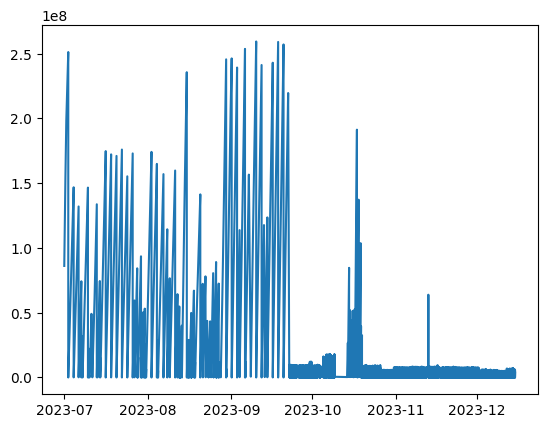

In [347]:
plt.plot(usage.value)
plt.show()

In [348]:
# --------------
# custom formula
# --------------
prevTelemetryValue = 0
prevGraphValue = 0
newGraphValue = 0
arr_value = usage.value.to_list()
# print(x, arr_value)
print('prepare#2.1')
for index in range(len(usage)):
    row = usage.iloc[index]
    # print(row)
    value = float(row.value)
    if index > 0:
        prevTelemetryValue = float(arr_value[index - 1])
        newTelemetryValue = value
        # kondisi 1
        if (prevGraphValue <= prevTelemetryValue):
            if (newTelemetryValue > prevTelemetryValue):
                newGraphValue = newTelemetryValue - prevTelemetryValue + prevGraphValue
            else:
                newGraphValue = prevGraphValue + newTelemetryValue
        else:
            if(newTelemetryValue < prevTelemetryValue):
                # b < a
                newGraphValue = prevGraphValue + newTelemetryValue
            else:
                # b >= a
                newGraphValue = newTelemetryValue - prevTelemetryValue + prevGraphValue
        prevGraphValue = newGraphValue
    else:
        newGraphValue = 0
        prevTelemetryValue = 0
        prevGraphValue = 0
    value = newGraphValue
    usage.at[row.timestamp, 'value'] = value
# print(usage["value"])
usage["value_back"] = usage['value']
usage["value"] = usage["value"].diff()

prepare#2.1


In [349]:
df_forecast=usage['value'].resample('d').sum()
df_forecast

timestamp
2023-07-01    129981748.0
2023-07-02     73071792.0
2023-07-03     73564104.0
2023-07-04     72789854.0
2023-07-05     72235385.0
                 ...     
2023-12-11     59218370.0
2023-12-12     73090960.0
2023-12-13     74278499.0
2023-12-14     76372402.0
2023-12-15     19402825.0
Freq: D, Name: value, Length: 168, dtype: float64

<Axes: xlabel='timestamp'>

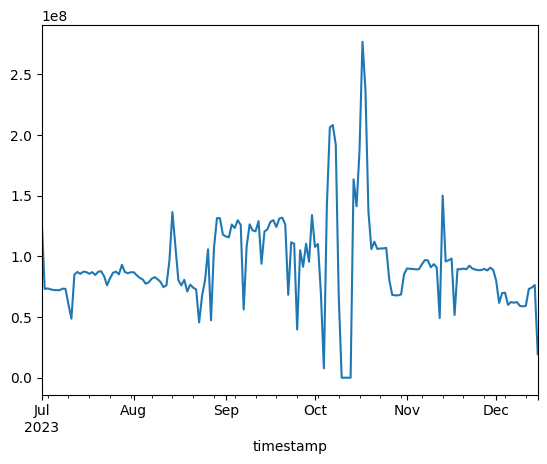

In [350]:
df_forecast.plot()

In [351]:
def check_stationarity(df_values):
    result = adfuller(df_values)
    print('Uji stasioneritas untuk kolom value:')
    print('ADF Statistic:', result[0])
    print('P-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f' {key}: {value}')

    # Interpretasi hasil uj
    if result[1] <= 0.05:
        print('ok')
        return True, result
    else:
        print('nope')
    return False, result

In [352]:
result = check_stationarity(df_forecast)
df_forecast = df_forecast
# if not result[0]:
#     # jika belum stationer, dibuat stationer dulu dengan differencing.!
#     df_diff = df_forecast.diff().dropna()
#     result = check_stationarity(df_diff)
#     print(df_diff)
#     # df_forecast = df_diff
#     plt.plot(df_diff)
#     plt.show()
print(result[0])

Uji stasioneritas untuk kolom value:
ADF Statistic: -6.617179336565794
P-value: 6.16527898283312e-09
Critical Values:
 1%: -3.47086589632514
 5%: -2.879330279087651
 10%: -2.57625492712671
ok
True


In [353]:
def check_stationarity(df_values):
    print("Results of KPSS Test:")
    kpsstest = kpss(df_values, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)
check_stationarity(df_forecast)

Results of KPSS Test:
Test Statistic           0.260293
p-value                  0.100000
Lags Used                6.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\HUMAN\AppData\Local\Temp\ipykernel_22616\413265320.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(df_values, regression="c", nlags="auto")


In [354]:
n_period = 15

start_date_str_train = '2023-07-01'
end_date_str_train = '2023-11-15'

start_date_str_predict = '2023-11-16'
end_date_str_predict = '2023-11-30'

start_date_str_test = '2023-07-01'
end_date_str_test = '2023-11-30'

start_date_str_sum = '2023-11-01'
end_date_str_sum = '2023-11-15'

start_date_str_range_sum = '2023-11-01'
end_date_str_range_sum = '2023-11-30'

start_date_str_graph = '2023-07-01'
end_date_str_graph = '2023-11-15'
train = df_forecast.loc[pd.to_datetime('2023-07-01'):pd.to_datetime('2023-11-15')]
print(train)
print(len(train))

timestamp
2023-07-01    129981748.0
2023-07-02     73071792.0
2023-07-03     73564104.0
2023-07-04     72789854.0
2023-07-05     72235385.0
                 ...     
2023-11-11     90826872.0
2023-11-12     49103521.0
2023-11-13    150008050.0
2023-11-14     95821132.0
2023-11-15     96770819.0
Freq: D, Name: value, Length: 138, dtype: float64
138


In [355]:
model = pm.auto_arima(train, m=1, d=1, seasonal=True, start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore', suppress_warnings=True, stepwise=True, trace=True)
model

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5146.104, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5146.660, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5146.335, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5144.115, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5126.544, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5127.521, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5127.325, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5134.836, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5147.261, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5127.454, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5124.986, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5144.323, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5144.650, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=5125.339, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [356]:
forecast_fix = model.predict(n_periods=n_period, return_conf_int=True)
forecast_fix

(2023-11-16    9.529622e+07
 2023-11-17    9.441409e+07
 2023-11-18    9.405729e+07
 2023-11-19    9.407966e+07
 2023-11-20    9.431874e+07
 2023-11-21    9.463559e+07
 2023-11-22    9.493331e+07
 2023-11-23    9.515925e+07
 2023-11-24    9.529730e+07
 2023-11-25    9.535596e+07
 2023-11-26    9.535635e+07
 2023-11-27    9.532265e+07
 2023-11-28    9.527594e+07
 2023-11-29    9.523113e+07
 2023-11-30    9.519656e+07
 Freq: D, dtype: float64,
 array([[3.16896766e+07, 1.58902765e+08],
        [1.73009517e+07, 1.71527234e+08],
        [1.31857163e+07, 1.74928858e+08],
        [1.26508997e+07, 1.75508427e+08],
        [1.28896608e+07, 1.75747823e+08],
        [1.31126271e+07, 1.76158557e+08],
        [1.33019099e+07, 1.76564712e+08],
        [1.34982629e+07, 1.76820234e+08],
        [1.36329127e+07, 1.76961685e+08],
        [1.36107234e+07, 1.77101191e+08],
        [1.33981404e+07, 1.77314552e+08],
        [1.30354705e+07, 1.77609839e+08],
        [1.25986766e+07, 1.77953197e+08],
        

In [357]:
forecast_range = pd.date_range(start=start_date_str_predict, periods=n_period, freq='d')
forecast_range

DatetimeIndex(['2023-11-16', '2023-11-17', '2023-11-18', '2023-11-19',
               '2023-11-20', '2023-11-21', '2023-11-22', '2023-11-23',
               '2023-11-24', '2023-11-25', '2023-11-26', '2023-11-27',
               '2023-11-28', '2023-11-29', '2023-11-30'],
              dtype='datetime64[ns]', freq='D')

In [358]:
forecast_fix_df = pd.DataFrame(forecast_fix[0], index=forecast_range,columns=['Prediction'])
forecast_fix_df

,Prediction
2023-11-16,9.529622e+07
2023-11-17,9.441409e+07
2023-11-18,9.405729e+07
2023-11-19,9.407966e+07
2023-11-20,9.431874e+07
2023-11-21,9.463559e+07
2023-11-22,9.493331e+07
2023-11-23,9.515925e+07
2023-11-24,9.529730e+07
2023-11-25,9.535596e+07


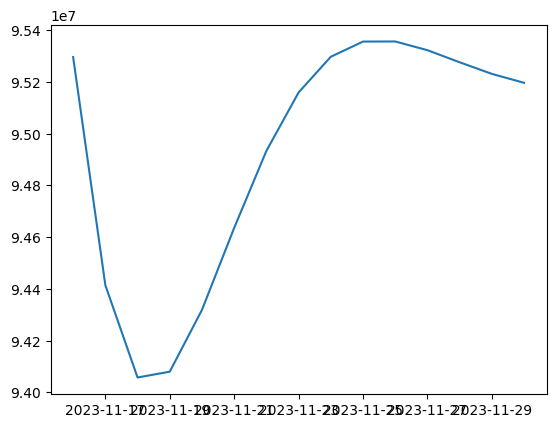

In [359]:
plt.plot(forecast_fix_df)
plt.show()

In [360]:
df_range_sum = df_forecast.loc[start_date_str_sum:end_date_str_sum]
df_range_sum

timestamp
2023-11-01     90004459.0
2023-11-02     89754710.0
2023-11-03     89599160.0
2023-11-04     89253139.0
2023-11-05     89405074.0
2023-11-06     93393576.0
2023-11-07     96849805.0
2023-11-08     96704900.0
2023-11-09     90976177.0
2023-11-10     93543146.0
2023-11-11     90826872.0
2023-11-12     49103521.0
2023-11-13    150008050.0
2023-11-14     95821132.0
2023-11-15     96770819.0
Freq: D, Name: value, dtype: float64

In [361]:
df_merge = pd.concat([df_range_sum, forecast_fix_df], axis=1)
df_merge

,value,Prediction
2023-11-01,90004459.0,NaN
2023-11-02,89754710.0,NaN
2023-11-03,89599160.0,NaN
2023-11-04,89253139.0,NaN
2023-11-05,89405074.0,NaN
2023-11-06,93393576.0,NaN
2023-11-07,96849805.0,NaN
2023-11-08,96704900.0,NaN
2023-11-09,90976177.0,NaN
2023-11-10,93543146.0,NaN


<Axes: >

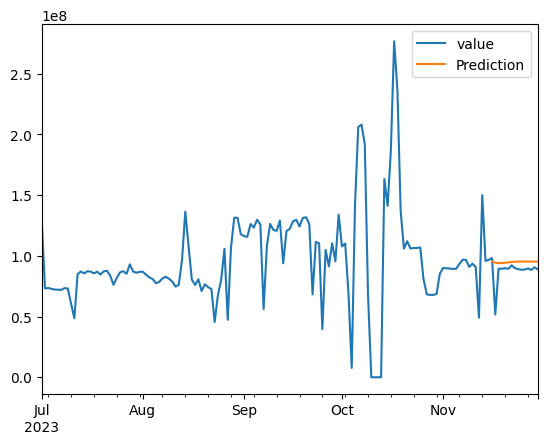

In [362]:
pd.concat([df_forecast.loc[start_date_str_test:end_date_str_test], forecast_fix_df], axis=1).plot()


In [363]:
df_merge = df_merge['value'].fillna(df_merge['Prediction'])
df_merge

2023-11-01    9.000446e+07
2023-11-02    8.975471e+07
2023-11-03    8.959916e+07
2023-11-04    8.925314e+07
2023-11-05    8.940507e+07
2023-11-06    9.339358e+07
2023-11-07    9.684980e+07
2023-11-08    9.670490e+07
2023-11-09    9.097618e+07
2023-11-10    9.354315e+07
2023-11-11    9.082687e+07
2023-11-12    4.910352e+07
2023-11-13    1.500080e+08
2023-11-14    9.582113e+07
2023-11-15    9.677082e+07
2023-11-16    9.529622e+07
2023-11-17    9.441409e+07
2023-11-18    9.405729e+07
2023-11-19    9.407966e+07
2023-11-20    9.431874e+07
2023-11-21    9.463559e+07
2023-11-22    9.493331e+07
2023-11-23    9.515925e+07
2023-11-24    9.529730e+07
2023-11-25    9.535596e+07
2023-11-26    9.535635e+07
2023-11-27    9.532265e+07
2023-11-28    9.527594e+07
2023-11-29    9.523113e+07
2023-11-30    9.519656e+07
Freq: D, Name: value, dtype: float64

In [364]:
value_sum_actual = df_forecast.loc[start_date_str_range_sum:end_date_str_range_sum].sum()
value_sum_predict = df_merge.sum()
mae = abs(value_sum_predict - value_sum_actual)
mape = ((mae / value_sum_actual) * 100)
print('Actual:',value_sum_actual)
print('Predict:',value_sum_predict)
print('Percentage:',(value_sum_predict / value_sum_actual) * 100)
print('MAE', mae.mean())
print('MAPE', mape.mean())   

Actual: 2715873832.0
Predict: 2825944581.8620243
Percentage: 104.05286683663677
MAE 110070749.8620243
MAPE 4.052866836636773


In [365]:
df_forecast.resample('ME').sum()

timestamp
2023-07-31    2.539428e+09
2023-08-31    2.672805e+09
2023-09-30    3.372942e+09
2023-10-31    3.335615e+09
2023-11-30    2.715874e+09
2023-12-31    9.481140e+08
Freq: ME, Name: value, dtype: float64


### report ukur ws3 mape untuk akhir november
-> 5 bulan: 1 Juli
Actual: 2715873832.0
Predict: 2825944581.8620243
Percentage: 104.05286683663677
MAE 110070749.8620243
MAPE 4.052866836636773

-> 4 bulan: 1 Agustus
Actual: 2715873832.0
Predict: 2807998253.610222
Percentage: 103.3920729499566
MAE 92124421.61022186
MAPE 3.392072949956604

-> 3 bulan: 1 September
Actual: 2715873832.0
Predict: 2966684046.3611045
Percentage: 109.2349729728205
MAE 250810214.3611045
MAPE 9.234972972820502

-> 2 bulan: 1 Oktober
Actual: 2715873832.0
Predict: 2853576825.0
Percentage: 105.07030155000218
MAE 137702993.0
MAPE 5.070301550002195

-> 1 bulan: 1 November
Actual: 2715873832.0
Predict: 2882569223.846238
Percentage: 106.13781796054502
MAE 166695391.84623814
MAPE 6.137817960545014